<a href="https://colab.research.google.com/github/GreenAlanMX/Images-processing/blob/main/Images_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
imagen=cv2.imread("SAPOS.jpg")


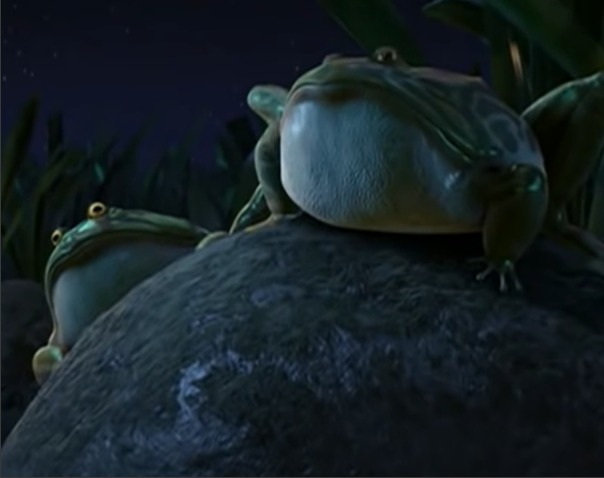

-1

In [ ]:
im = cv2.imread('SAPOS.jpg')
cv2_imshow(im)  # Usa esta función en vez de cv2.imshow
cv2.waitKey(0)


#Load Image
###Convert it to grayscale

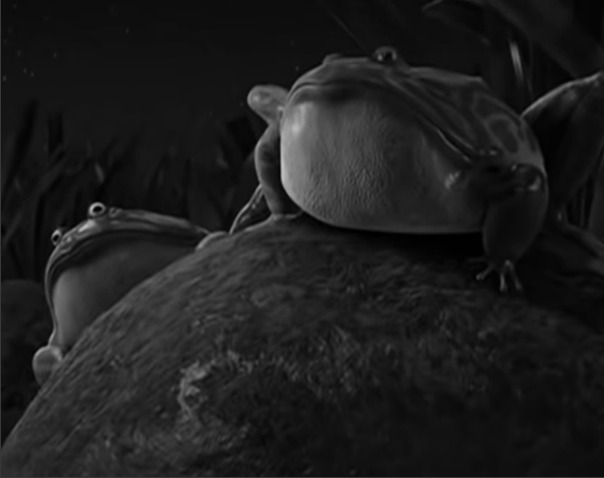

-1

In [ ]:
gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)

In [ ]:
cv2.imwrite('gray_sapos.jpg',gray_image)

True

###Gaussian,sobel, Median Filters(just Python)

In [ ]:
from PIL import Image
import os

def apply_kernel(image, kernel):
    width, height = image.size
    pixels = image.load()
    output = Image.new("L", (width, height))
    output_pixels = output.load()

    kernel_size = len(kernel)
    offset = kernel_size // 2

    for x in range(offset, width - offset):
        for y in range(offset, height - offset):
            value = 0
            for i in range(kernel_size):
                for j in range(kernel_size):
                    pixel = pixels[x + i - offset, y + j - offset]
                    value += pixel * kernel[i][j]
            output_pixels[x, y] = min(max(int(value), 0), 255)

    return output


def gaussian_filter(image):
    gaussian_kernel = [
        [1/16, 2/16, 1/16],
        [2/16, 4/16, 2/16],
        [1/16, 2/16, 1/16]
    ]
    return apply_kernel(image, gaussian_kernel)


def sobel_filter(image):
    sobel_x = [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]

    sobel_y = [
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ]

    width, height = image.size
    pixels = image.load()
    output = Image.new("L", (width, height))
    output_pixels = output.load()

    for x in range(1, width - 1):
        for y in range(1, height - 1):
            gx = gy = 0
            for i in range(3):
                for j in range(3):
                    pixel = pixels[x + i - 1, y + j - 1]
                    gx += pixel * sobel_x[i][j]
                    gy += pixel * sobel_y[i][j]
            gradient_magnitude = int((gx**2 + gy**2)**0.5)
            output_pixels[x, y] = min(max(gradient_magnitude, 0), 255)

    return output


def median_filter(image):
    width, height = image.size
    pixels = image.load()
    output = Image.new("L", (width, height))
    output_pixels = output.load()

    for x in range(1, width - 1):
        for y in range(1, height - 1):
            neighbors = []
            for i in range(3):
                for j in range(3):
                    neighbors.append(pixels[x + i - 1, y + j - 1])
            output_pixels[x, y] = sorted(neighbors)[len(neighbors) // 2]

    return output


if __name__ == "__main__":
    img_path = "/content/gray_sapos_1.jpg"
    output_dir = "/content/output/"

    # Crear el directorio si no existe
    os.makedirs(output_dir, exist_ok=True)

    image = Image.open(img_path).convert("L")

    blurred = gaussian_filter(image)
    blurred.save(os.path.join(output_dir, "gaussian_blur.jpg"))

    edges = sobel_filter(image)
    edges.save(os.path.join(output_dir, "sobel_edges.jpg"))

    denoised = median_filter(image)
    denoised.save(os.path.join(output_dir, "median_filter.jpg"))

    print(f"Images saved to {output_dir}")

# Ahora las imágenes procesadas se guardarán en la carpeta especificada. ¿Te gustaría personalizar los nombres o cambiar la carpeta de salida? 🚀


Images saved to /content/output/


##Sobel Filter(Just Python)

##Numpy Gaussian Filter

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
def gaussianKernel(size,sigma):
   kernel= cv.getGaussianKernel(size,sigma)
   Kernel= np.outer(kernel,Kernel)
   return kernel



def gaussianFiltering():
   root=os.getcwd()
   imgPath=os.path.join(root,'/content/gray_sapos.jpg')
   img=plt.imread(imgPath)

   n=51
   fig=plt.figure()
   fig.add_subplot(121)
   kernel= gaussianKernel(n,2)
   plt.imshow(kernel)

   ax= fig.add_subplot(122, projection='3d')
   x=np.arange(0,n,1)
   y=np.arange(0,n,1)
   X,Y=np.meshgrid(x,y)
   ax.plot_surface(X,Y,kernel,cmap='viridis')
   plt.show()


   if __name__=='__main__':
      gaussianFiltering()


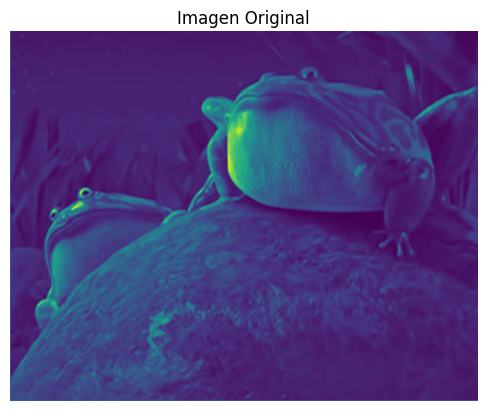

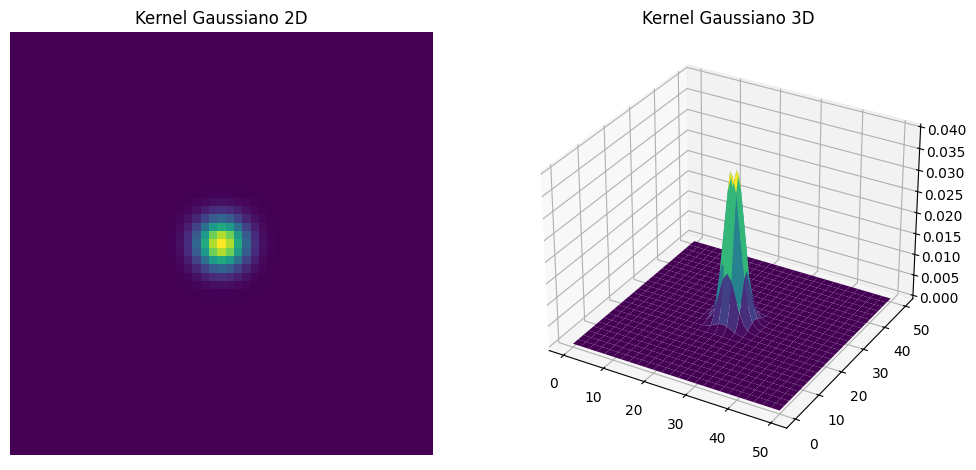

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
import os

def gaussianKernel(size, sigma):
    kernel = cv2.getGaussianKernel(size, sigma)
    kernel = np.outer(kernel, kernel)  # Corrige la multiplicación
    return kernel

def gaussianFiltering():
    # Asegúrate de que la imagen esté en la ruta correcta
    imgPath = '/content/gray_sapos.jpg'
    img = plt.imread(imgPath)

    # Visualiza la imagen original
    plt.figure()
    plt.imshow(img)
    plt.title("Imagen Original")
    plt.axis('off')
    plt.show()

    # Visualiza el kernel gaussiano en 2D y 3D
    n = 51
    kernel = gaussianKernel(n, 2)

    fig = plt.figure(figsize=(12, 6))

    # Gráfico 2D del kernel
    ax1 = fig.add_subplot(121)
    ax1.imshow(kernel, cmap='viridis')
    ax1.set_title("Kernel Gaussiano 2D")
    ax1.axis('off')

    # Gráfico 3D del kernel
    ax2 = fig.add_subplot(122, projection='3d')
    x = np.arange(0, n, 1)
    y = np.arange(0, n, 1)
    X, Y = np.meshgrid(x, y)
    ax2.plot_surface(X, Y, kernel, cmap='viridis')
    ax2.set_title("Kernel Gaussiano 3D")

    plt.show()

if __name__ == '__main__':
    gaussianFiltering()


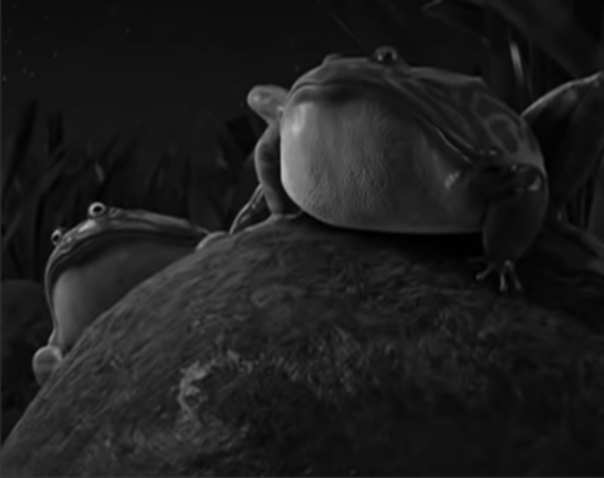

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1. Cargar la imagen en escala de grises
img = cv2.imread("SAPOS.jpg", cv2.IMREAD_GRAYSCALE)

# 2. Definir el kernel Gaussiano 3x3
gauss_kernel = np.array([
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
], dtype=np.float32)

# 3. Aplicar convolución (filtro) usando filter2D de OpenCV
blurred = cv2.filter2D(img, -1, gauss_kernel)

# Mostrar resultado
cv2_imshow(blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()


##Numpy Gaussian Filter pure python

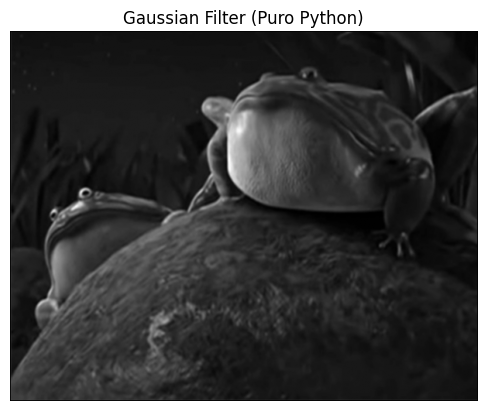

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def gaussian_filter_pure_python(image_path):
    # Kernel Gaussiano 3x3
    kernel = [
        [1/16, 2/16, 1/16],
        [2/16, 4/16, 2/16],
        [1/16, 2/16, 1/16]
    ]

    # Abrir imagen en escala de grises
    image = Image.open(image_path).convert("L")
    width, height = image.size
    pixels = image.load()

    # Crear imagen de salida
    output_image = Image.new("L", (width, height))
    output_pixels = output_image.load()

    # Convolución manual
    k_size = len(kernel)  # 3
    offset = k_size // 2  # 1

    for x in range(offset, width - offset):
        for y in range(offset, height - offset):
            accum = 0
            for i in range(k_size):
                for j in range(k_size):
                    px = pixels[x + i - offset, y + j - offset]
                    accum += px * kernel[i][j]
            # Limitar [0..255] y asignar
            output_pixels[x, y] = int(min(max(accum, 0), 255))

    return output_image

# Ejemplo de uso
if __name__ == "__main__":
    result_pure_py = gaussian_filter_pure_python("SAPOS.jpg")

    # Mostrar con Matplotlib
    plt.imshow(result_pure_py, cmap='gray')
    plt.title("Gaussian Filter (Puro Python)")
    plt.axis('off')
    plt.show()

    # Opcional (en algunos entornos locales):
    # result_pure_py.show()
    # result_pure_py.save("gaussian_pure_python.jpg")


##Numpy Gaussian Filter using matrix operations

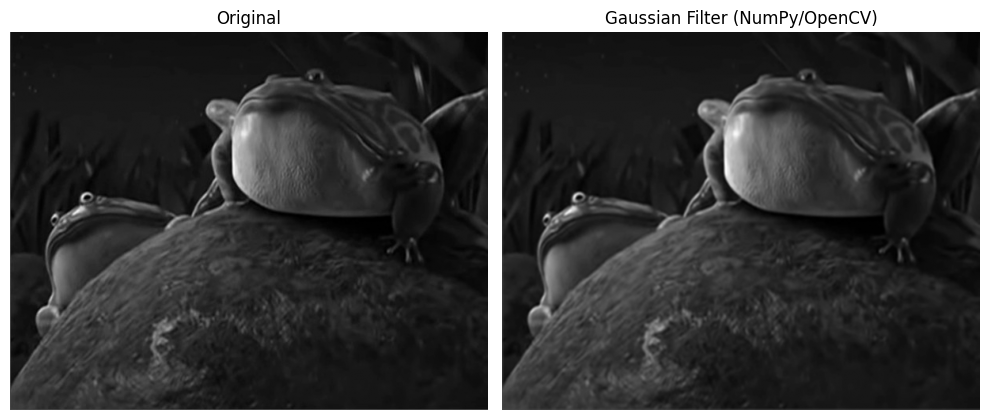

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen en escala de grises (devuelve un array NumPy)
img = cv2.imread("SAPOS.jpg", cv2.IMREAD_GRAYSCALE)

# Definir kernel Gaussiano 3x3
gaussian_kernel = np.array([
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
], dtype=np.float32)

# Convolución usando OpenCV (que internamente está optimizado en C/C++)
blurred_numpy = cv2.filter2D(img, -1, gaussian_kernel)

# Mostrar con matplotlib
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blurred_numpy, cmap='gray')
plt.title('Gaussian Filter (NumPy/OpenCV)')
plt.axis('off')

plt.tight_layout()
plt.show()


##Numpy Gaussian Filter, cython


In [ ]:
!pip install cython
%load_ext cython

In [ ]:
%%cython
# Para usar Cython en Colab/Jupyter, se requiere esta magic cell
# Asegúrate de que Cython esté instalado: !pip install cython

cimport cython
import numpy as np
cimport numpy as np

@cython.boundscheck(False)  # Desactiva comprobación de límites
@cython.wraparound(False)   # Desactiva wrap-around en índices negativos
def convolve2d_cython(np.ndarray[np.uint8_t, ndim=2] image,
                      np.ndarray[np.float32_t, ndim=2] kernel):
    cdef int width = image.shape[1]
    cdef int height = image.shape[0]
    cdef int k_h = kernel.shape[0]
    cdef int k_w = kernel.shape[1]
    cdef int pad_h = k_h // 2
    cdef int pad_w = k_w // 2

    # Salida en float para acumular
    cdef np.ndarray[np.float32_t, ndim=2] output = np.zeros((height, width), dtype=np.float32)

    cdef int i, j, ki, kj
    cdef float val

    # Convolución manual
    for i in range(pad_h, height - pad_h):
        for j in range(pad_w, width - pad_w):
            val = 0.0
            for ki in range(k_h):
                for kj in range(k_w):
                    val += image[i + ki - pad_h, j + kj - pad_w] * kernel[ki, kj]
            output[i, j] = val

    return output


Content of stderr:
In file included from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_91cab858557dc991eb0b050bb46570fd0c0640c1.c:1250:
/usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~

##Sobel Filter, edge detection


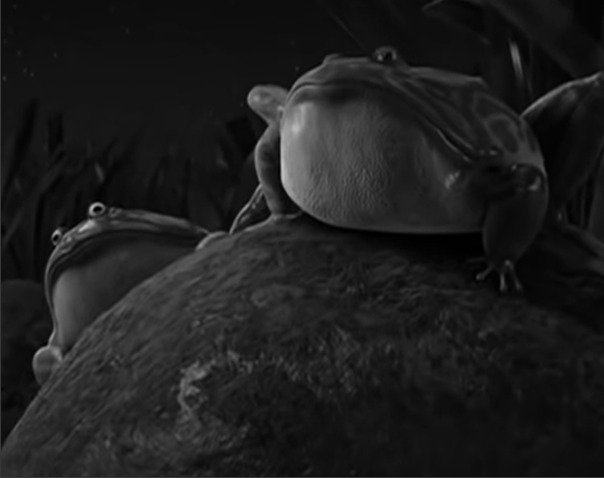

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Cargar la imagen en escala de grises
img = cv2.imread("SAPOS.jpg", cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original (en gris)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


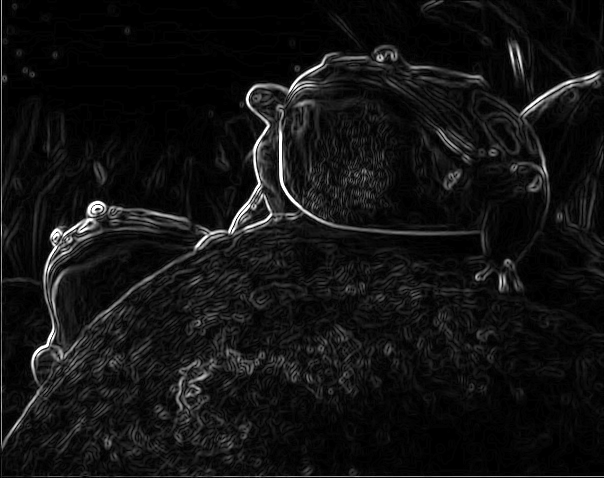

In [ ]:
# Definir kernels Sobel para la dirección X e Y
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

# Aplicar convolución con los kernels Sobel
grad_x = cv2.filter2D(img, cv2.CV_64F, sobel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, sobel_y)

# Calcular la magnitud del gradiente
magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Ajustar valores y convertir a 8 bits (0-255)
magnitude = np.clip(magnitude, 0, 255)
magnitude = magnitude.astype(np.uint8)

# Mostrar resultado
cv2_imshow(magnitude)
cv2.waitKey(0)
cv2.destroyAllWindows()


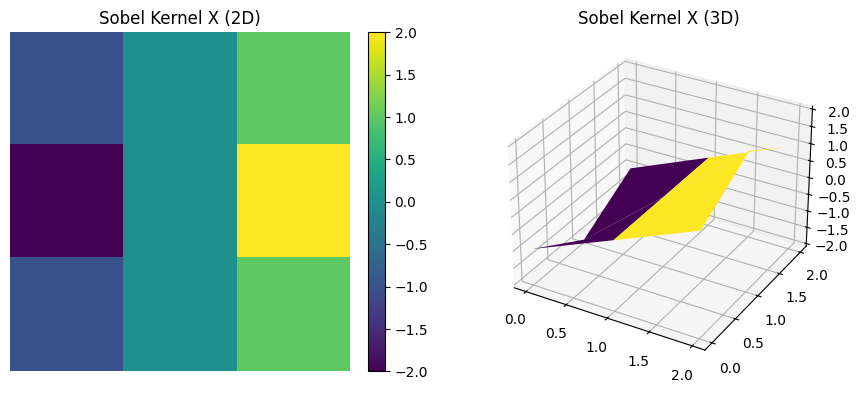

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el kernel Sobel X
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=float)

# --- Gráfica 2D ---
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
cax = ax1.imshow(sobel_x, cmap='viridis', interpolation='nearest')
ax1.set_title("Sobel Kernel X (2D)")
ax1.axis('off')
fig.colorbar(cax, ax=ax1, fraction=0.046, pad=0.04)

# --- Gráfica 3D ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# Crear las coordenadas para la malla
x = np.arange(sobel_x.shape[1])
y = np.arange(sobel_x.shape[0])
X, Y = np.meshgrid(x, y)

# Convertir el kernel a "z"
Z = sobel_x

ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_title("Sobel Kernel X (3D)")

plt.tight_layout()
plt.show()


##Sobel Filter, edge detection pure python

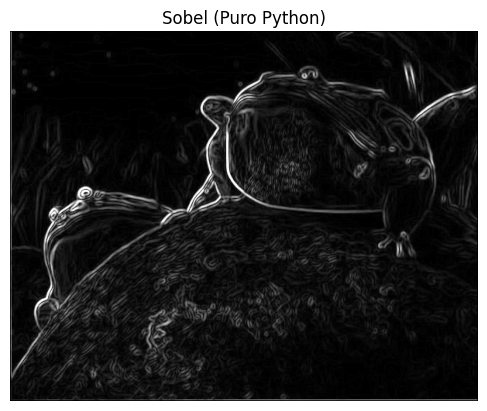

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import math

def sobel_filter_pure_python(image_path):
    """
    Aplica el filtro Sobel en X e Y píxel por píxel (Puro Python).
    """
    # Sobel X e Y (3x3)
    sobel_x = [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]
    sobel_y = [
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ]

    # Cargar imagen en escala de grises
    img = Image.open(image_path).convert("L")
    width, height = img.size
    pixels = img.load()

    # Crear imagen de salida
    output_img = Image.new("L", (width, height))
    output_pixels = output_img.load()

    # Evitar procesar bordes
    for x in range(1, width - 1):
        for y in range(1, height - 1):
            gx = 0.0
            gy = 0.0
            # Aplicar kernel
            for i in range(3):
                for j in range(3):
                    px = pixels[x + i - 1, y + j - 1]
                    gx += px * sobel_x[i][j]
                    gy += px * sobel_y[i][j]

            # Magnitud del gradiente
            mag = int(math.sqrt(gx**2 + gy**2))
            # Limitar [0..255]
            mag = max(0, min(255, mag))

            output_pixels[x, y] = mag

    return output_img

# Ejemplo de uso
if __name__ == "__main__":
    result_pp = sobel_filter_pure_python("SAPOS.jpg")

    # Mostrar con Matplotlib
    plt.imshow(result_pp, cmap='gray')
    plt.title("Sobel (Puro Python)")
    plt.axis('off')
    plt.show()

    # Si deseas mostrar en otro entorno local (no Notebook),
    # podrías usar: result_pp.show()  # y/o guardar la imagen:
    # result_pp.save("sobel_pure_python.jpg")

##Sobel Filter, edge detection using matrix operations

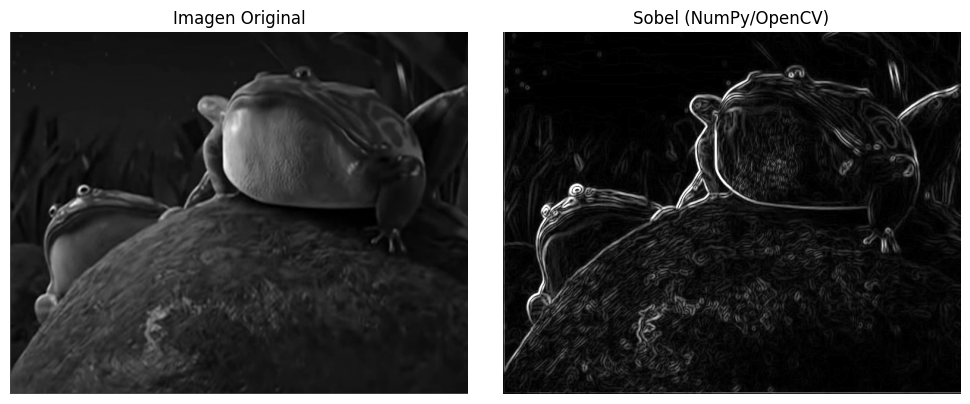

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread("SAPOS.jpg", cv2.IMREAD_GRAYSCALE)

# Sobel en X e Y usando OpenCV (internal C++ optimizations):
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Magnitud del gradiente
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Escalar y convertir a uint8
magnitude = np.clip(magnitude, 0, 255)
edges_numpy = magnitude.astype(np.uint8)

# Visualizar
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges_numpy, cmap='gray')
plt.title("Sobel (NumPy/OpenCV)")
plt.axis('off')

plt.tight_layout()
plt.show()


##Sobel Filter, edge detection, cython

In [ ]:
%%cython
cimport cython
import numpy as np
cimport numpy as np
from libc.math cimport sqrt

@cython.boundscheck(False)
@cython.wraparound(False)
def sobel_filter_cython(np.ndarray[np.uint8_t, ndim=2] image):
    """
    Aplica Sobel en X e Y usando Cython, retorna la magnitud del gradiente.
    image: np.ndarray 2D (uint8), escala de grises.
    Return: np.ndarray 2D (float32) con la magnitud de Sobel.
    """

    cdef int height = image.shape[0]
    cdef int width = image.shape[1]

    # Definir kernels Sobel como NumPy arrays y convertirlos a memory views
    cdef float[:, :] sobel_x = np.array([
        [-1.0,  0.0,  1.0],
        [-2.0,  0.0,  2.0],
        [-1.0,  0.0,  1.0]
    ], dtype=np.float32)

    cdef float[:, :] sobel_y = np.array([
        [-1.0, -2.0, -1.0],
        [ 0.0,  0.0,  0.0],
        [ 1.0,  2.0,  1.0]
    ], dtype=np.float32)

    # Crear salida en float32
    cdef np.ndarray[np.float32_t, ndim=2] output = np.zeros((height, width), dtype=np.float32)

    cdef int x, y, i, j, xx, yy
    cdef float gx, gy, mag

    # Evitar los bordes (1 píxel)
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            gx = 0.0
            gy = 0.0
            for j in range(3):
                for i in range(3):
                    xx = x + i - 1
                    yy = y + j - 1
                    gx += image[yy, xx] * sobel_x[j, i]
                    gy += image[yy, xx] * sobel_y[j, i]

            mag = sqrt(gx * gx + gy * gy)
            output[y, x] = mag

    return output


Content of stderr:
In file included from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_ad91244dedef095540fc92bcc52b07bde70391f6.c:1252:
/usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~

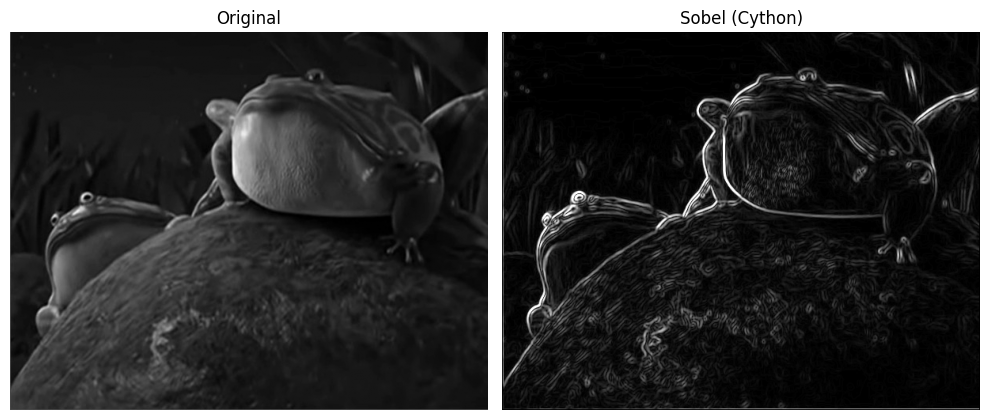

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar la imagen en escala de grises
img = cv2.imread("SAPOS.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("No se encontró la imagen 'SAPOS.jpg'. Reemplaza con tu ruta real.")

# 2. Llamar a la función Cython
edges_cython = sobel_filter_cython(img)

# 3. Convertir a uint8 para poder mostrarlo como imagen
edges_cython_uint8 = np.clip(edges_cython, 0, 255).astype(np.uint8)

# 4. Mostrar comparación entre original y Sobel Cython
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges_cython_uint8, cmap='gray')
plt.title("Sobel (Cython)")
plt.axis("off")

plt.tight_layout()
plt.show()


##Median Filter, Noise reduction

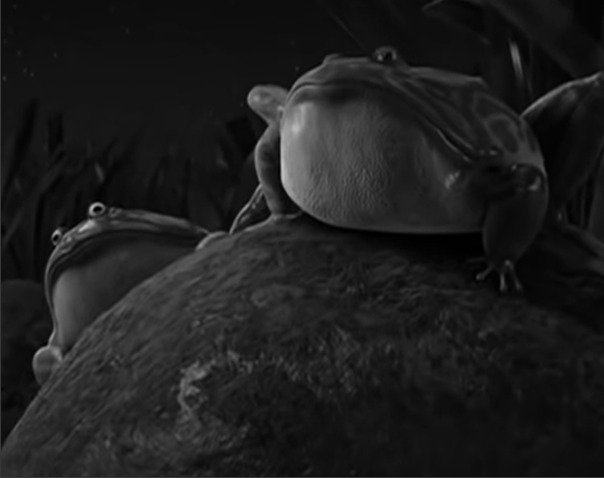

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Cargar la imagen en escala de grises
img = cv2.imread("SAPOS.jpg", cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


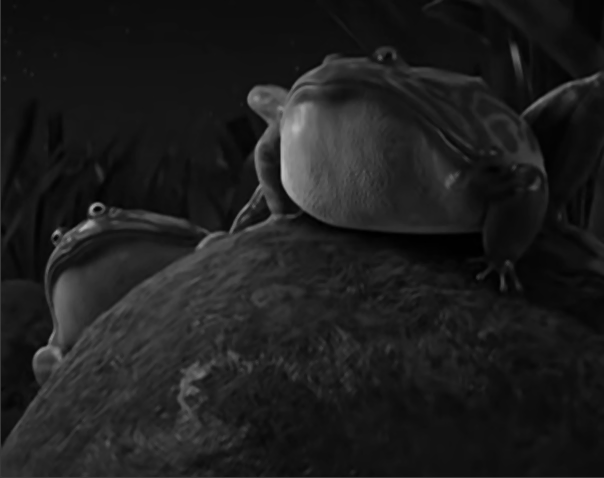

In [ ]:
# Aplicar filtro de mediana con un vecindario 3x3
median_filtered = cv2.medianBlur(img, 3)

# Mostrar resultado
cv2_imshow(median_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()


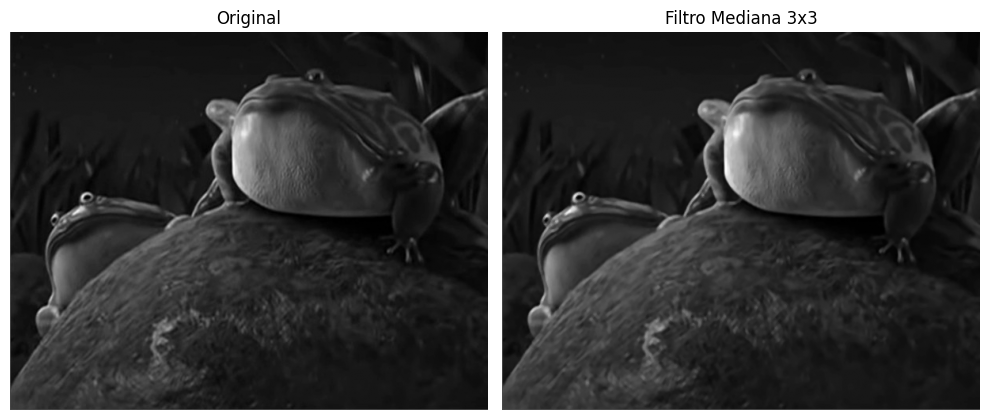

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Cargar imagen en escala de grises
img = cv2.imread('SAPOS.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Aplicar filtro de mediana
median_filtered = cv2.medianBlur(img, 3)

# 3. Mostrar resultados con Matplotlib
plt.figure(figsize=(10,5))

# Imagen original
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

# Imagen filtrada (mediana)
plt.subplot(1,2,2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Filtro Mediana 3x3')
plt.axis('off')

plt.tight_layout()
plt.show()


##Median Filter, Noise reduction pure python

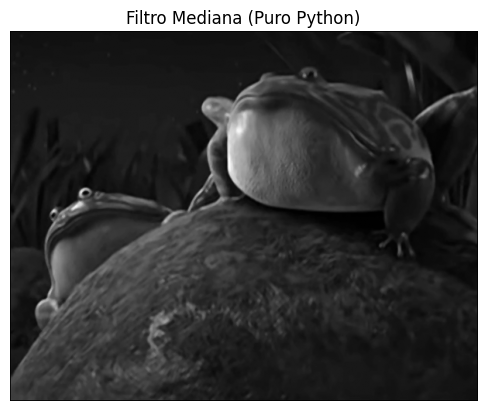

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def median_filter_pure_python(image_path):
    """
    Aplica un filtro de mediana 3x3 a la imagen, usando bucles en Python y PIL.
    """
    # Cargar imagen en escala de grises
    img = Image.open(image_path).convert("L")
    width, height = img.size
    pixels = img.load()

    # Crear imagen de salida
    output_img = Image.new("L", (width, height))
    output_pixels = output_img.load()

    # Recorrer píxel por píxel (omitiendo bordes)
    for x in range(1, width - 1):
        for y in range(1, height - 1):
            # Recolectar vecinos 3x3
            neighbors = []
            for i in range(-1, 2):  # -1, 0, 1
                for j in range(-1, 2):
                    nx = x + i
                    ny = y + j
                    neighbors.append(pixels[nx, ny])

            # Ordenar y tomar la mediana (índice 4 en lista de 9)
            neighbors.sort()
            median_value = neighbors[4]

            output_pixels[x, y] = median_value

    return output_img

# ------------------------------
# Ejemplo de uso
# ------------------------------
if __name__ == "__main__":
    result_python = median_filter_pure_python("SAPOS.jpg")

    # Mostrar con Matplotlib
    plt.imshow(result_python, cmap='gray')
    plt.title("Filtro Mediana (Puro Python)")
    plt.axis('off')
    plt.show()

    # Si deseas, también puedes mostrar usando el método show() de PIL
    # result_python.show()  # Solo funciona en algunos entornos locales.


##Median Filter, Noise reduction using matrix operation

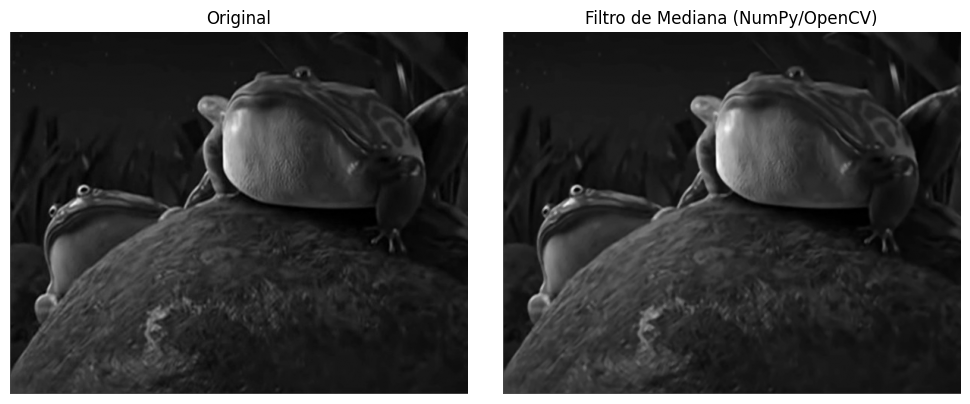

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread("SAPOS.jpg", cv2.IMREAD_GRAYSCALE)

# Aplicar el filtro de mediana 3x3 con OpenCV (internamente optimizado en C++)
median_np = cv2.medianBlur(img, 3)

# Mostrar comparación
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(median_np, cmap='gray')
plt.title("Filtro de Mediana (NumPy/OpenCV)")
plt.axis("off")

plt.tight_layout()
plt.show()


##Median Filter, Noise reduction, cython

In [ ]:
%%cython
cimport cython
import numpy as np
cimport numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def median_filter_cython(np.ndarray[np.uint8_t, ndim=2] image):
    """
    Aplica un filtro de mediana 3x3 sobre 'image' (2D, tipo uint8) y
    retorna la imagen filtrada en float32. Ignora 1 píxel en el borde.
    """
    cdef int height = image.shape[0]
    cdef int width = image.shape[1]

    # Crear la salida en float32 (para luego convertir a uint8)
    cdef np.ndarray[np.float32_t, ndim=2] output = np.zeros((height, width), dtype=np.float32)

    cdef int x, y, i, j, xx, yy
    cdef int neighbors[9]   # arreglo C de 9 enteros (3x3)
    cdef int k, m, n, temp

    # Evitar bordes
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            # Recolectar 9 vecinos
            k = 0
            for j in range(-1, 2):
                for i in range(-1, 2):
                    xx = x + i
                    yy = y + j
                    neighbors[k] = image[yy, xx]
                    k += 1

            # Ordenar "neighbors" de forma simple (burbuja o inserción)
            for m in range(9):
                for n in range(m+1, 9):
                    if neighbors[m] > neighbors[n]:
                        temp = neighbors[m]
                        neighbors[m] = neighbors[n]
                        neighbors[n] = temp

            # La mediana es el 5to valor en 0..8 => índice 4
            output[y, x] = neighbors[4]

    return output


Content of stderr:
In file included from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_502388f731a20248fcdc8c75823de22fd08bbbb4.c:1253:
/usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~

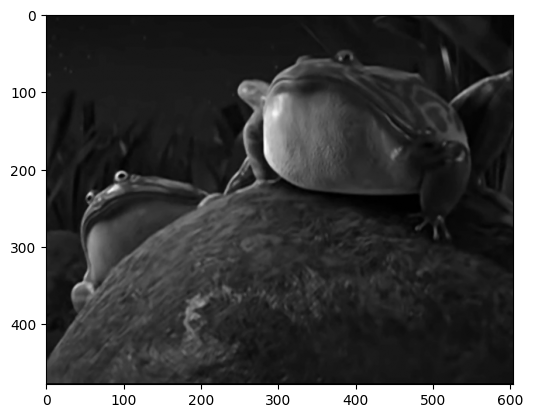

In [ ]:
# 1. Cargar la imagen
img = cv2.imread("SAPOS.jpg", cv2.IMREAD_GRAYSCALE)

# 2. Llamar a la función Cython
median_cy = median_filter_cython(img)

# 3. Convertir y mostrar
median_cy = np.clip(median_cy, 0, 255).astype(np.uint8)

plt.figure()
plt.imshow(median_cy, cmap='gray')
plt.show()
